In [34]:
# Code Author: Martin Palazzo <martinepalazzo@gmail.com>

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


xtr = iris.data[train_index]
ytr = iris.target[train_index]
xte = iris.data[test_index]
yte = iris.target[test_index]

n_classes = len(np.unique(ytr))

In [42]:
# Define the PCK
def proba_cluster_kernel(inits,comps,xtr_ae):
    kpc = np.zeros((xtr_ae.shape[0],xtr_ae.shape[0]))
    m = xtr_ae.shape[0]
    from sklearn.mixture import GaussianMixture
    for q in range(0,inits):
        for g in range(2,comps+1):
            gmm =  GaussianMixture(n_components=g,
                           max_iter=20, random_state=q, init_params='random')
            gmm.fit(xtr_ae)
            #print("GMM fit OK")
            for i in range(0,m):
                for j in range(0,m):
                    kpc[i,j] = kpc[i,j]+ np.dot(gmm.predict_proba(xtr_ae)[i],gmm.predict_proba(xtr_ae)[j])
    return kpc

In [45]:
kpc = proba_cluster_kernel(4,5,xtr)

/Users/palazzom/anaconda/envs/tfkeras/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/palazzom/anaconda/envs/tfkeras/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/palazzom/anaconda/envs/tfkeras/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/palazzom/anaconda/envs/tfkeras/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, 

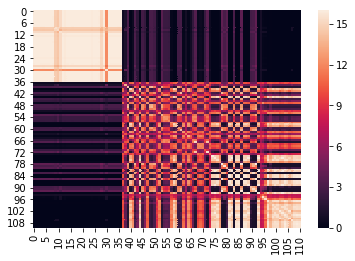

In [46]:
sns.heatmap(kpc)
plt.show()